In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
# Carregar a imagem mario.png
try:
    img_mario = Image.open("arquivos\\mario.png")
    mario_array = np.array(img_mario)
except FileNotFoundError:
    print("Erro: O arquivo 'mario.png' não foi encontrado. Certifique-se de que está no mesmo diretório.")
    exit()

In [ ]:
# Dimensões da imagem original
height, width, channels = mario_array.shape
print(f"Dimensões da imagem original: Altura={height}, Largura={width}, Canais={channels}")

# 1. Original
original = mario_array

# 2. Metade Esquerda
metade_esquerda = mario_array[:, :width // 2, :]

# 3. Metade Superior
metade_superior = mario_array[:height // 2, :, :]

# 4. Flip Horizontal
flip_horizontal = np.fliplr(mario_array)

# 5. Flip Vertical
flip_vertical = np.flipud(mario_array)

# 6. Imagem em Escala de Cinza
img_gray_pil = img_mario.convert('L') 
mario_gray_array = np.array(img_gray_pil)
escala_de_cinza = np.stack([mario_gray_array, mario_gray_array, mario_gray_array], axis=-1)

Dimensões da imagem original: Altura=951, Largura=860, Canais=4


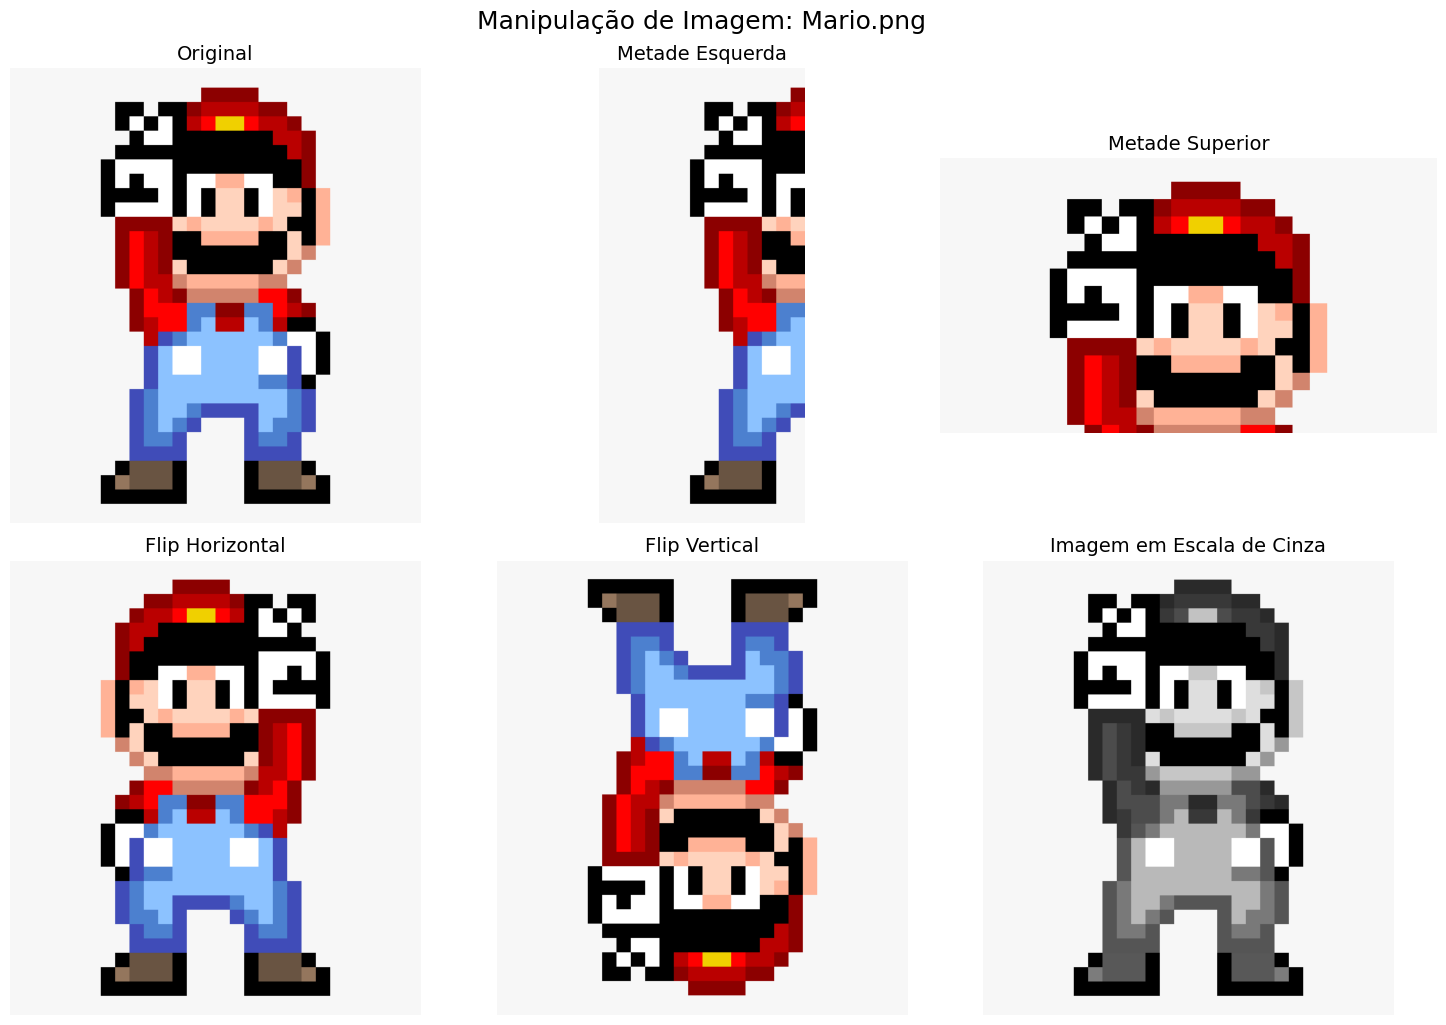

In [6]:
# Geração da figura final com todas as visualizações em uma única imagem
titles = [
    "Original", "Metade Esquerda", "Metade Superior",
    "Flip Horizontal", "Flip Vertical", "Imagem em Escala de Cinza"
]
images = [
    original, metade_esquerda, metade_superior,
    flip_horizontal, flip_vertical, escala_de_cinza
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (img, title) in enumerate(zip(images, titles)):
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off') # Remove os eixos para uma visualização mais limpa

plt.tight_layout()
plt.suptitle('Manipulação de Imagem: Mario.png', fontsize=18, y=1.02)
plt.show()

In [2]:
# 1. Definir as Funções de Ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh_func(x):
    return np.tanh(x)

def gelu(x):
    a = np.sqrt(2 / np.pi)
    b = 0.044715
    return 0.5 * x * (1 + np.tanh(a * (x + b * x**3)))

def leaky_relu(x):
    return np.maximum(0.01 * x, x)

def swish(x):
    return x / (1 + np.exp(-x))

In [3]:
# 2. Gerar os Valores de X
# 1000 valores igualmente espaçados entre -5 e 5
x = np.linspace(-5, 5, 1000)

In [4]:
# 3. Calcular os Valores de Y para cada Função
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh_func(x)
y_gelu = gelu(x)
y_leaky_relu = leaky_relu(x)
y_swish = swish(x)

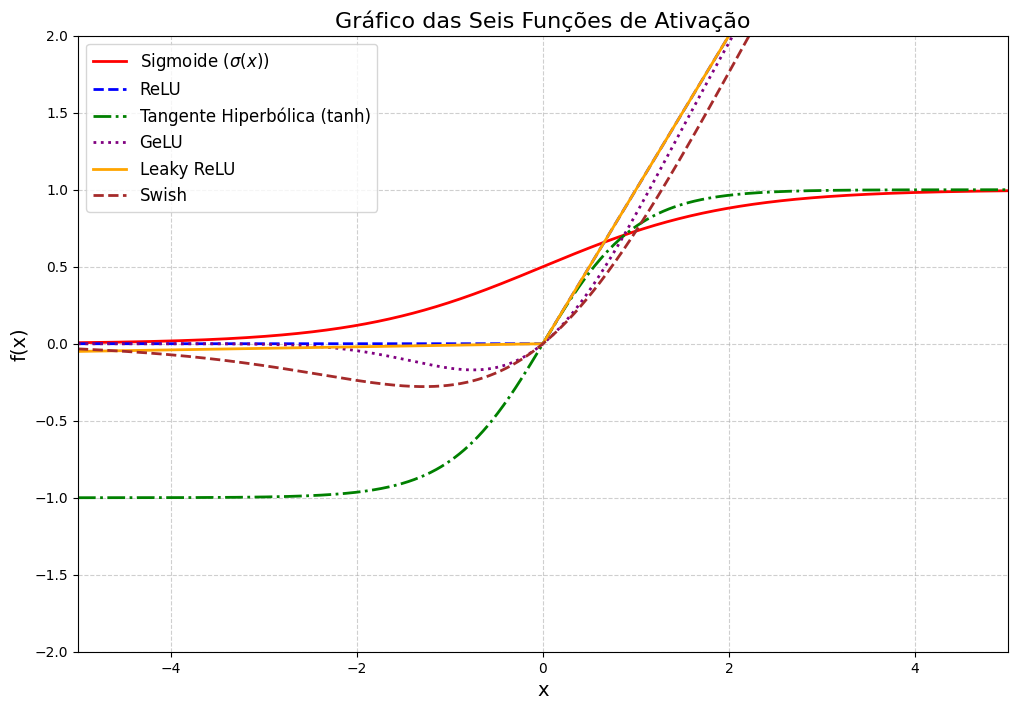

In [ ]:
# 4. Criar o Gráfico (Única Figura)
plt.figure(figsize=(12, 8)) 

# Plotar cada função
plt.plot(x, y_sigmoid, label='Sigmoide ($\\sigma(x)$)', linestyle='-', color='red', linewidth=2)
plt.plot(x, y_relu, label='ReLU', linestyle='--', color='blue', linewidth=2)
plt.plot(x, y_tanh, label='Tangente Hiperbólica (tanh)', linestyle='-.', color='green', linewidth=2)
plt.plot(x, y_gelu, label='GeLU', linestyle=':', color='purple', linewidth=2)
plt.plot(x, y_leaky_relu, label='Leaky ReLU', linestyle='-', color='orange', linewidth=2)
plt.plot(x, y_swish, label='Swish', linestyle='--', color='brown', linewidth=2)

# Adicionar título e rótulos
plt.title('Gráfico das Seis Funções de Ativação', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)

# Adicionar grade e legenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)

# Definir limites dos eixos para melhor visualização (opcional)
plt.xlim([-5, 5])
plt.ylim([-2, 2]) 

plt.show()